In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Synergy_raw_data_2024.csv')

In [3]:
df

NP                Bacteria ATCC(species)  \
0      Ag        Escherichia coli           NaN   
1      Ag        Salmonella typhi           NaN   
2      Ag   Staphylococcus aureus           NaN   
3      Ag      Micrococcus luteus           NaN   
4      Ag        Escherichia coli           NaN   
...   ...                     ...           ...   
3321  CuO   Staphylococcus aureus     ATCC 6538   
3322  CuO   Staphylococcus aureus           NaN   
3323  CuO  Pseudomonas aeruginosa     ATCC 9027   
3324  CuO  Pseudomonas aeruginosa           p41   
3325  CuO  Pseudomonas aeruginosa           p21   

                                        NP_Synthesis          Drug  \
0     green_synthesis from fungus Trichoderma viride  Erythromycin   
1     green_synthesis from fungus Trichoderma viride  Erythromycin   
2     green_synthesis from fungus Trichoderma viride  Erythromycin   
3     green_synthesis from fungus Trichoderma viride  Erythromycin   
4     green_synthesis from fungus Trichoderma viride     Kanamycin   
...                                              ...           ...   
3321               chem_synthesis_from_Cu(NO3)2⋅3H2O  Tetracycline   
3322               chem_synthesis_from_Cu(NO3)2⋅3H2O  Tetracycline   
3323               chem_synthesis_from_Cu(NO3)2⋅3H2O  Tetracycline   
3324               chem_synthesis_from_Cu(NO3)2⋅3H2O  Tetracycline   
3325               chem_synthesis_from_Cu(NO3)2⋅3H2O  Tetracycline   

      Drug_dose (μg/disk)  NP_concentration (μg/disk or μg/ml)  \
0                    10.0                                 10.0   
1                    10.0                                 10.0   
2                    10.0                                 10.0   
3                    10.0                                 10.0   
4                    10.0                                 10.0   
...                   ...                                  ...   
3321                  NaN                                  NaN   
3322                  NaN                                  NaN   
3323                  NaN                                  NaN   
3324                  NaN                                  NaN   
3325                  NaN                                  NaN   

     NP size_min (nm)  NP size_max (nm)  NP size_avg (nm)  ... ChEBI ID  \
0                   5              40.0              18.0  ...      NaN   
1                   5              40.0              18.0  ...      NaN   
2                   5              40.0              18.0  ...      NaN   
3                   5              40.0              18.0  ...      NaN   
4                   5              40.0              18.0  ...      NaN   
...               ...               ...               ...  ...      ...   
3321                4              12.0               8.0  ...      NaN   
3322                4              12.0               8.0  ...      NaN   
3323                4              12.0               8.0  ...      NaN   
3324                4              12.0               8.0  ...      NaN   
3325                4              12.0               8.0  ...      NaN   

                                              reference  \
0     https://www.sciencedirect.com/science/article/...   
1     https://www.sciencedirect.com/science/article/...   
2     https://www.sciencedirect.com/science/article/...   
3     https://www.sciencedirect.com/science/article/...   
4     https://www.sciencedirect.com/science/article/...   
...                                                 ...   
3321  https://www.sciencedirect.com/science/article/...   
3322  https://www.sciencedirect.com/science/article/...   
3323  https://www.sciencedirect.com/science/article/...   
3324  https://www.sciencedirect.com/science/article/...   
3325  https://www.sciencedirect.com/science/article/...   

                              doi  time (hr)  \
0      10.1016/j.nano.2009.04.006        NaN   
1                             NaN        NaN   
2     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 33 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   NP                                                                                3260 non-null   object 
 1   Bacteria                                                                          3326 non-null   object 
 2   ATCC(species)                                                                     1399 non-null   object 
 3   NP_Synthesis                                                                      3230 non-null   object 
 4   Drug                                                                              2216 non-null   object 
 5   Drug_dose (μg/disk)                                                               1212 non-null   float64
 6   

In [5]:
df['NP size_min (nm)'] = pd.to_numeric(df['NP size_min (nm)'], errors='coerce')

# Verify the conversion
print(df['NP size_min (nm)'].head(10))
print(df['NP size_min (nm)'].dtype)

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
5    5.0
6    5.0
7    5.0
8    5.0
9    5.0
Name: NP size_min (nm), dtype: float64
float64


In [6]:
# Create the new column MDR_enc
df['MDR_enc'] = df['MDR'].apply(lambda x: 0 if pd.isna(x) or str(x).strip() == '' else 1)

# Verify the new column
print(df[['MDR', 'MDR_enc']].head(10))

   MDR  MDR_enc
0  NaN        0
1  NaN        0
2  NaN        0
3  NaN        0
4  NaN        0
5  NaN        0
6  NaN        0
7  NaN        0
8  NaN        0
9  NaN        0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 34 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   NP                                                                                3260 non-null   object 
 1   Bacteria                                                                          3326 non-null   object 
 2   ATCC(species)                                                                     1399 non-null   object 
 3   NP_Synthesis                                                                      3230 non-null   object 
 4   Drug                                                                              2216 non-null   object 
 5   Drug_dose (μg/disk)                                                               1212 non-null   float64
 6   

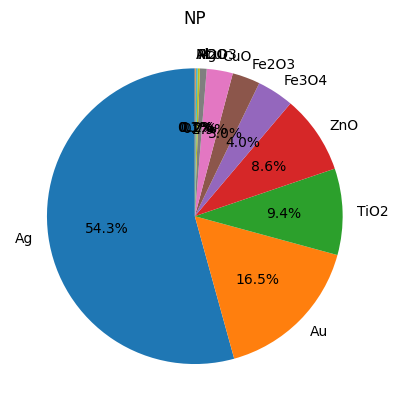

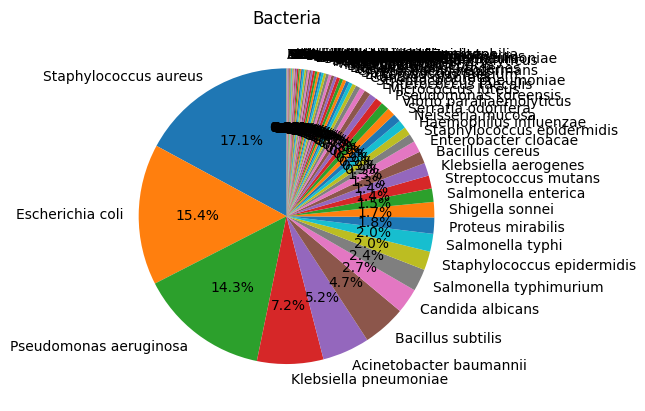

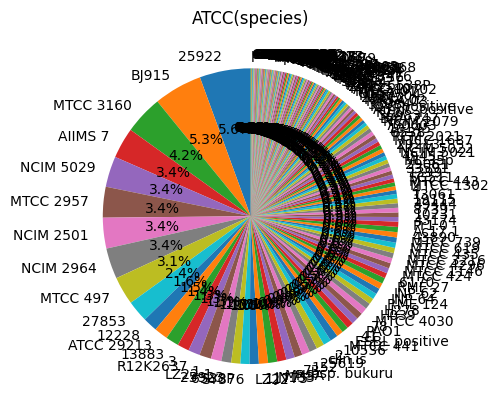

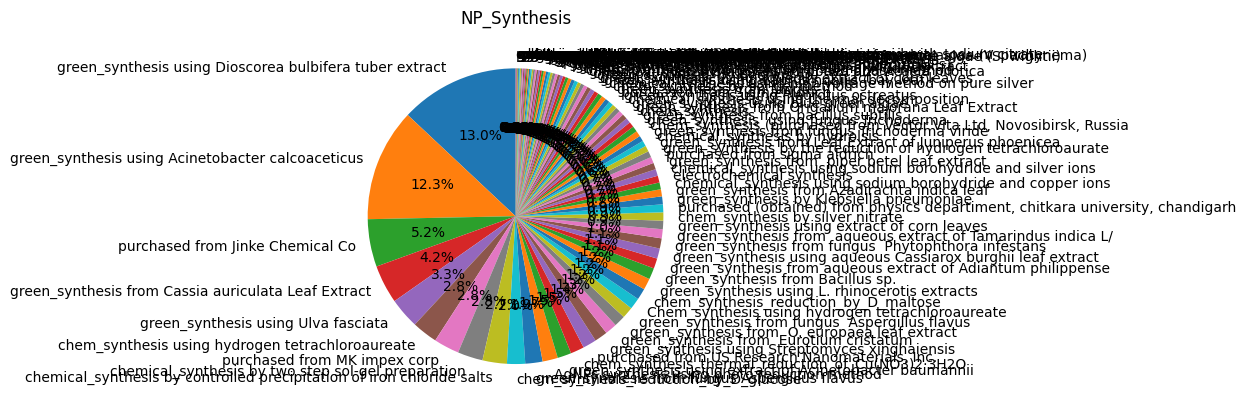

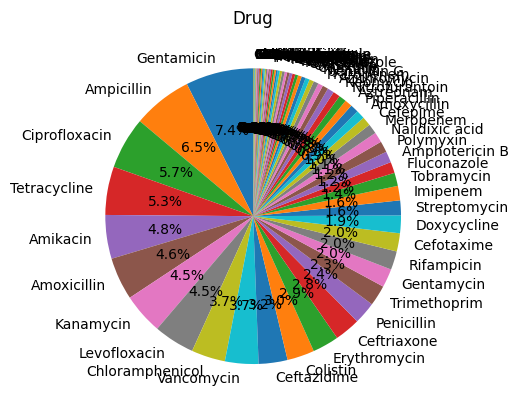

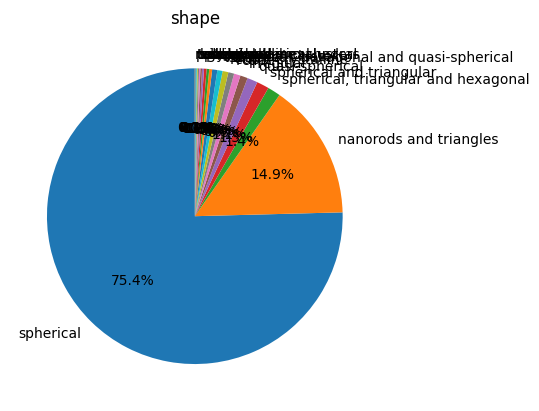

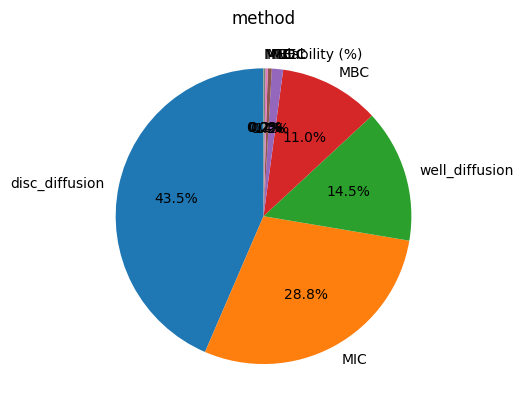

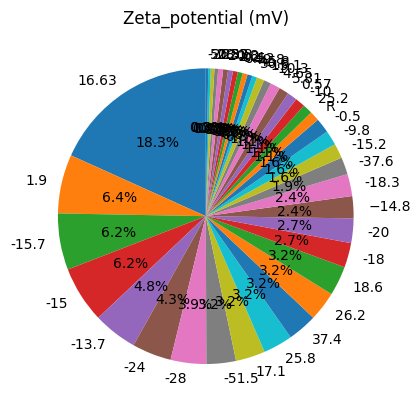

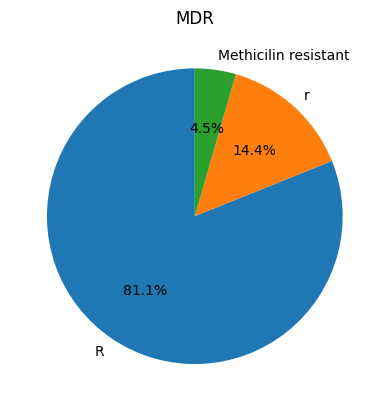

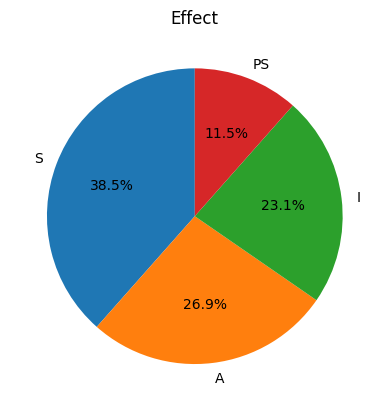

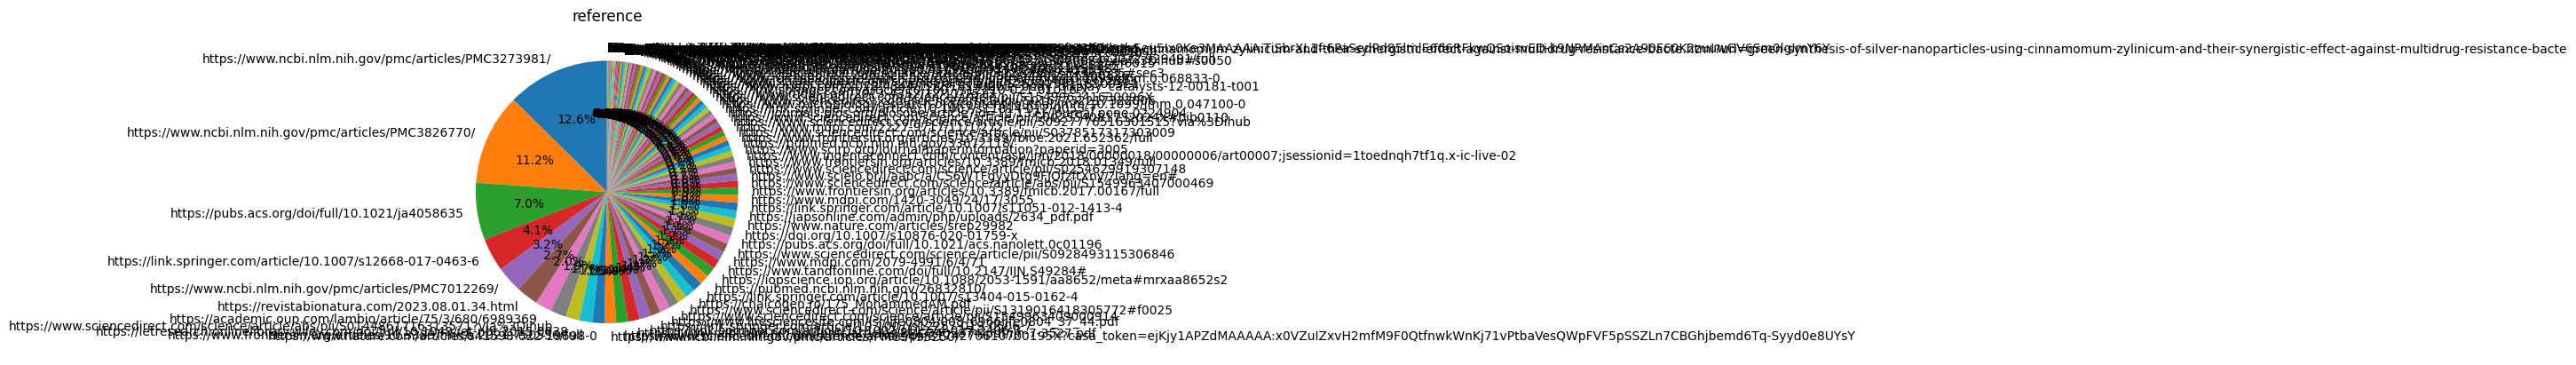

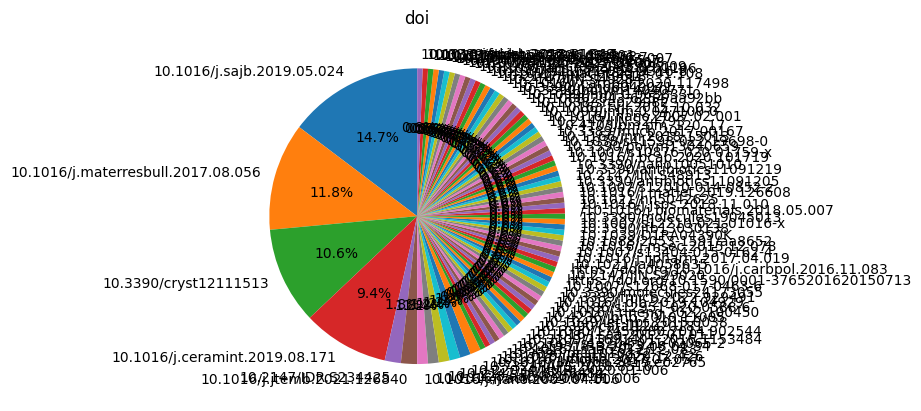

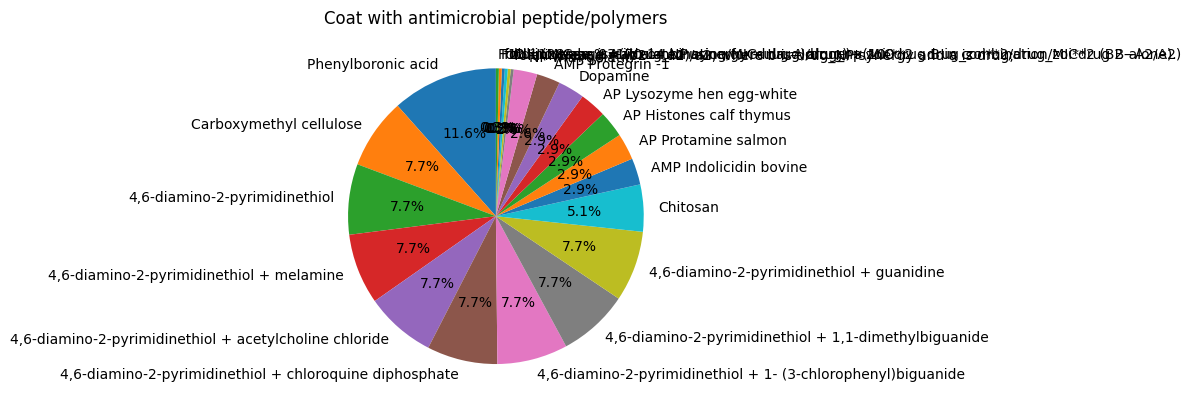

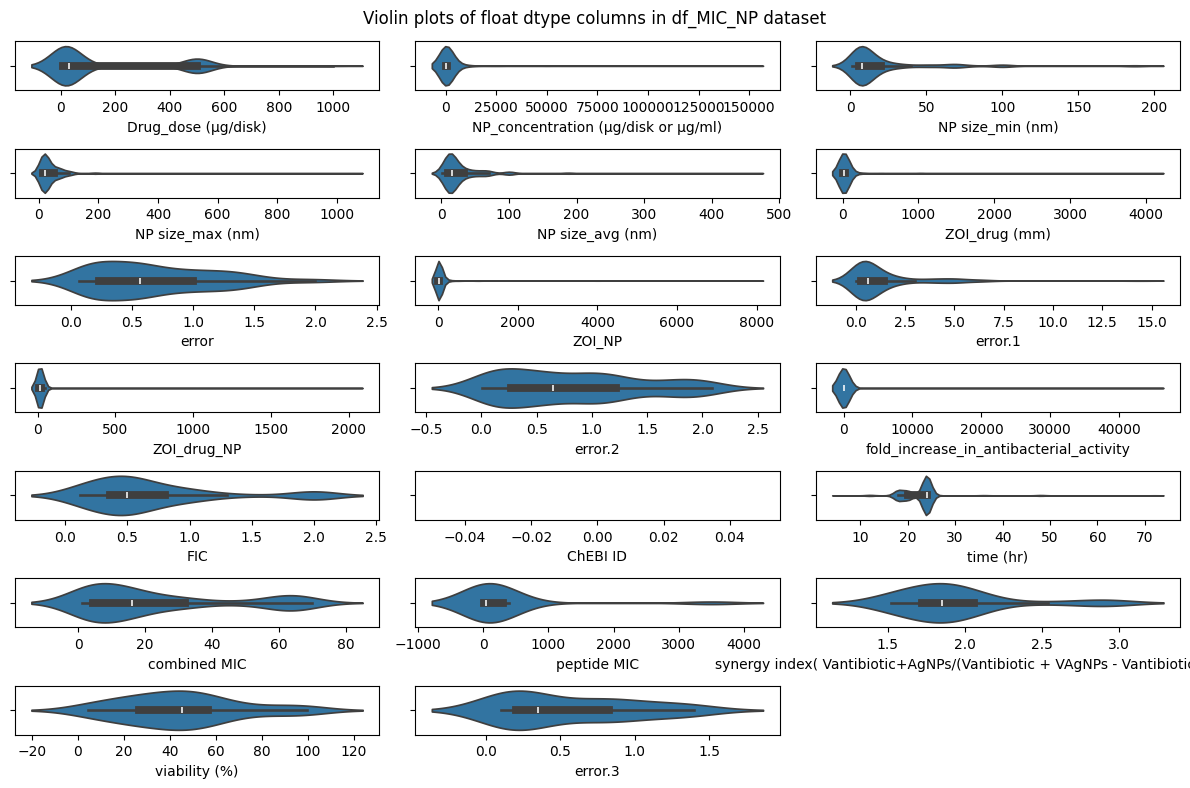

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_MIC_NP is your DataFrame

# Pie plots for object (categorical) columns
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(col)
    plt.ylabel('')  # Hides the y-label to make it cleaner
    plt.show()

# Violin plots for float columns
float_cols = df.select_dtypes(include='float').columns
num_float_cols = len(float_cols)

# Determine the grid size for subplots
nrows = (num_float_cols // 3) + (1 if num_float_cols % 3 != 0 else 0)
fig, ax = plt.subplots(nrows, 3, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(float_cols):
    sns.violinplot(data=df, x=col, ax=ax[i])
    ax[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

fig.suptitle("Violin plots of float dtype columns in df_MIC_NP dataset")
plt.tight_layout()
plt.show()


In [9]:
# Calculate the percentage of each method in the original DataFrame
method_counts = df['method'].value_counts(dropna=False)
total_count = len(df)
method_percentages = (method_counts / total_count) * 100

# Print the percentage of each method
print("Percentage of each method:")
print(method_percentages)


Percentage of each method:
method
disc_diffusion    42.453397
MIC               28.111846
well_diffusion    14.191221
MBC               10.703548
NaN                2.465424
viability (%)      1.202646
MBIC               0.420926
MBEC               0.240529
MFC                0.180397
MTC                0.030066
Name: count, dtype: float64


In [10]:
print(df['method'].unique())

['disc_diffusion' 'MIC' 'MBC' 'well_diffusion' 'MBEC' 'viability (%)'
 'MBIC' nan 'MTC' 'MFC']


In [11]:
# Define the method lists
mc_methods = ['MIC', 'MBC', 'MBIC', 'MTC', 'MFC']
zoi_methods = ['well_diffusion', 'disc_diffusion']

# Filter the DataFrame into df_MC and df_ZOI
df_MC = df[df['method'].isin(mc_methods)]
df_ZOI = df[df['method'].isin(zoi_methods)]

In [12]:
df_MC

NP                Bacteria ATCC(species)  \
16     Ag        Escherichia coli           NaN   
17     Ag        Salmonella typhi           NaN   
18     Ag   Staphylococcus aureus           NaN   
19     Ag      Micrococcus luteus           NaN   
60     Ag   Staphylococcus aureus         25922   
...   ...                     ...           ...   
3321  CuO   Staphylococcus aureus     ATCC 6538   
3322  CuO   Staphylococcus aureus           NaN   
3323  CuO  Pseudomonas aeruginosa     ATCC 9027   
3324  CuO  Pseudomonas aeruginosa           p41   
3325  CuO  Pseudomonas aeruginosa           p21   

                                           NP_Synthesis          Drug  \
16       green_synthesis from fungus Trichoderma viride           NaN   
17       green_synthesis from fungus Trichoderma viride           NaN   
18       green_synthesis from fungus Trichoderma viride           NaN   
19       green_synthesis from fungus Trichoderma viride           NaN   
60    green_synthesis from fungus  Phytophthora infe...     Cefazolin   
...                                                 ...           ...   
3321                  chem_synthesis_from_Cu(NO3)2⋅3H2O  Tetracycline   
3322                  chem_synthesis_from_Cu(NO3)2⋅3H2O  Tetracycline   
3323                  chem_synthesis_from_Cu(NO3)2⋅3H2O  Tetracycline   
3324                  chem_synthesis_from_Cu(NO3)2⋅3H2O  Tetracycline   
3325                  chem_synthesis_from_Cu(NO3)2⋅3H2O  Tetracycline   

      Drug_dose (μg/disk)  NP_concentration (μg/disk or μg/ml)  \
16                    NaN                                 10.0   
17                    NaN                                 10.0   
18                    NaN                                 10.0   
19                    NaN                                 10.0   
60                    NaN                                  NaN   
...                   ...                                  ...   
3321                  NaN                                  NaN   
3322                  NaN                                  NaN   
3323                  NaN                                  NaN   
3324                  NaN                                  NaN   
3325                  NaN                                  NaN   

      NP size_min (nm)  NP size_max (nm)  NP size_avg (nm)  ...  \
16                 5.0              40.0              18.0  ...   
17                 5.0              40.0              18.0  ...   
18                 5.0              40.0              18.0  ...   
19                 5.0              40.0              18.0  ...   
60                 5.0              80.0              60.0  ...   
...                ...               ...               ...  ...   
3321               4.0              12.0               8.0  ...   
3322               4.0              12.0               8.0  ...   
3323               4.0              12.0               8.0  ...   
3324               4.0              12.0               8.0  ...   
3325               4.0              12.0               8.0  ...   

                                              reference  \
16    https://www.sciencedirect.com/science/article/...   
17    https://www.sciencedirect.com/science/article/...   
18    https://www.sciencedirect.com/science/article/...   
19    https://www.sciencedirect.com/science/article/...   
60            https://www.nature.com/articles/srep29982   
...                                                 ...   
3321  https://www.sciencedirect.com/science/article/...   
3322  https://www.sciencedirect.com/science/article/...   
3323  https://www.sciencedirect.com/science/article/...   
3324  https://www.sciencedirect.com/science/article/...   
3325  https://www.sciencedirect.com/science/article/...   

                              doi  time (hr)  \
16                            NaN        NaN   
17                            NaN        NaN   
18                            NaN        NaN   
19                

# df_MC

In [13]:
df_MC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312 entries, 16 to 3325
Data columns (total 34 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   NP                                                                                1246 non-null   object 
 1   Bacteria                                                                          1312 non-null   object 
 2   ATCC(species)                                                                     912 non-null    object 
 3   NP_Synthesis                                                                      1230 non-null   object 
 4   Drug                                                                              910 non-null    object 
 5   Drug_dose (μg/disk)                                                               5 non-null      float64
 6   NP_c

In [14]:
df_MC.to_csv('MIC.csv')

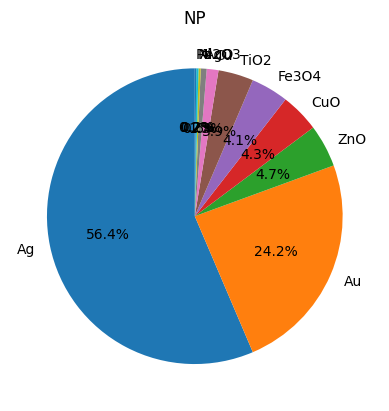

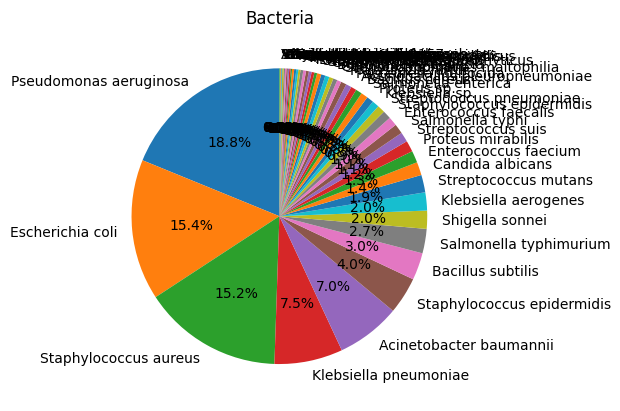

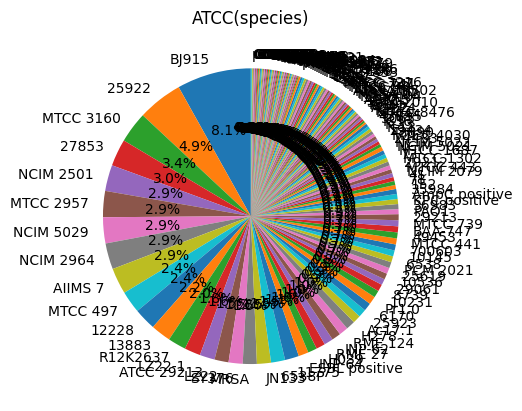

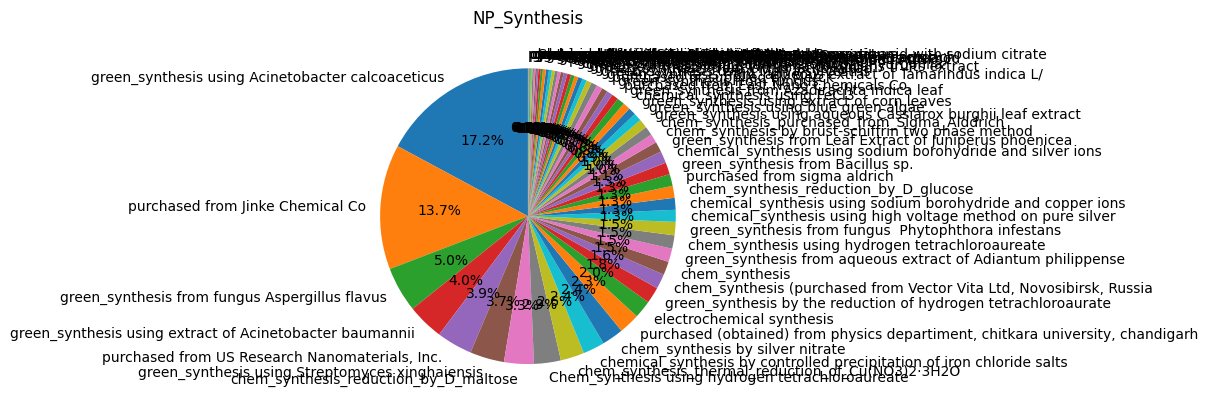

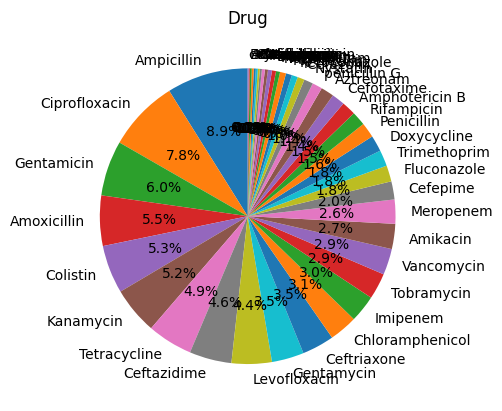

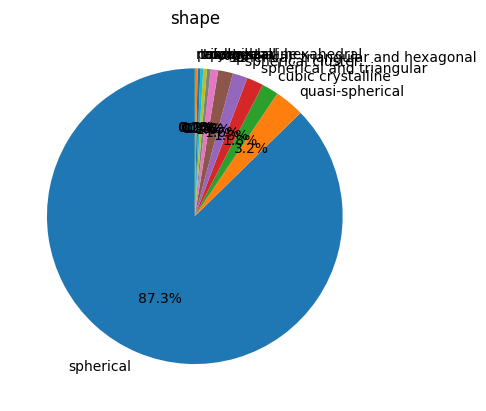

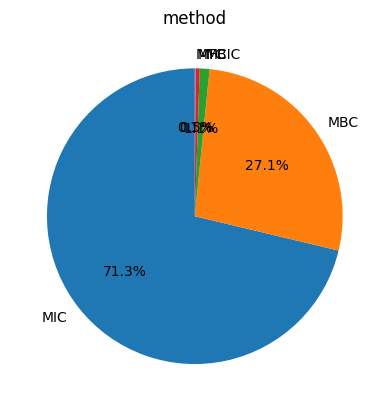

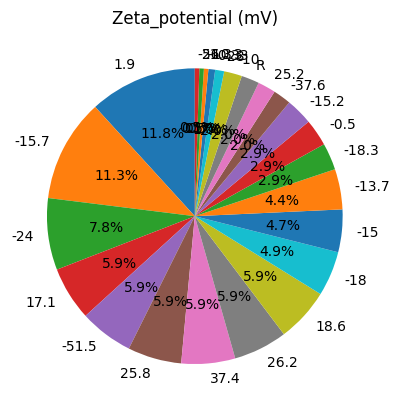

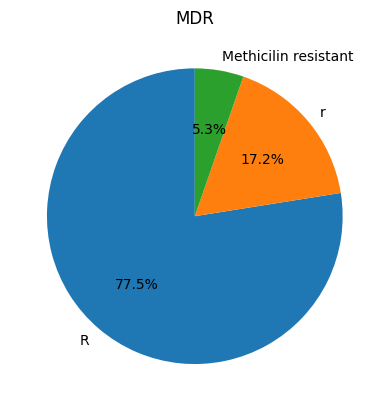

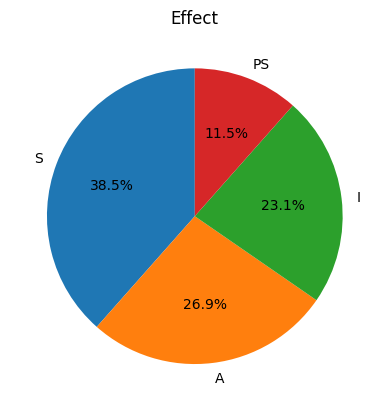

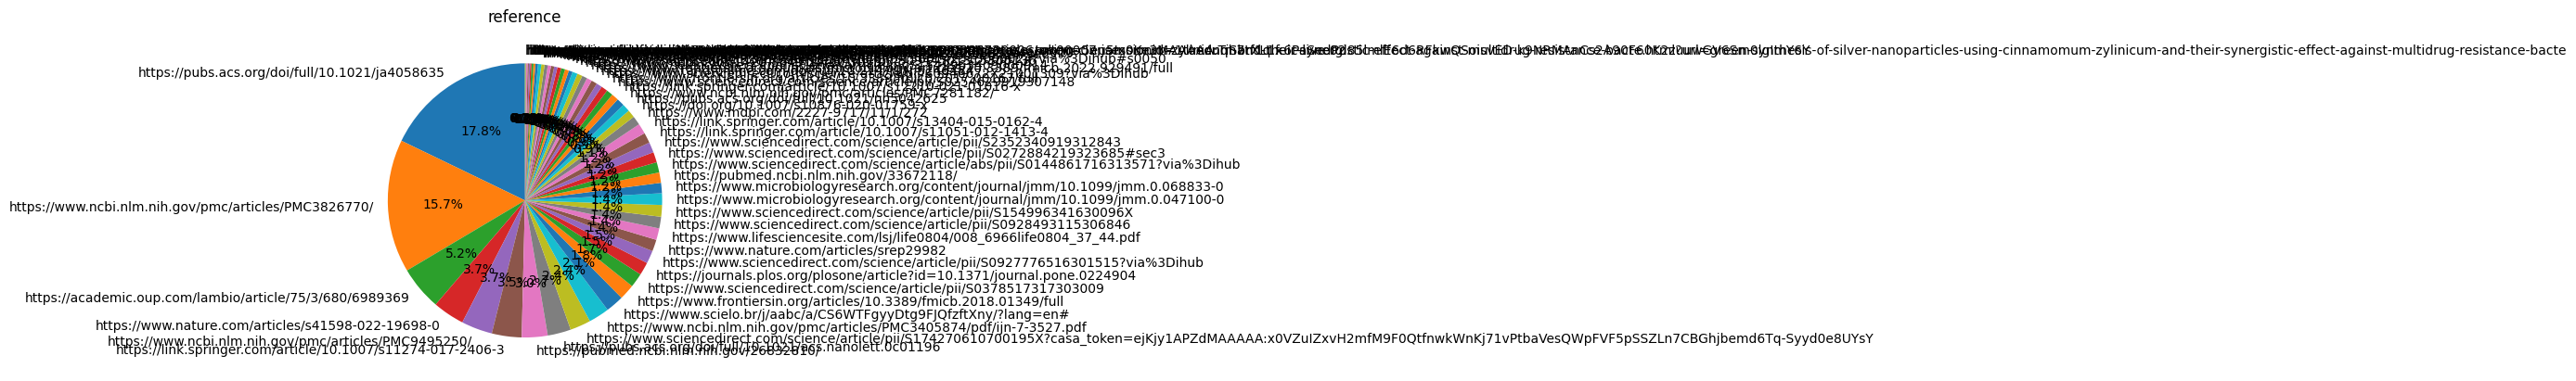

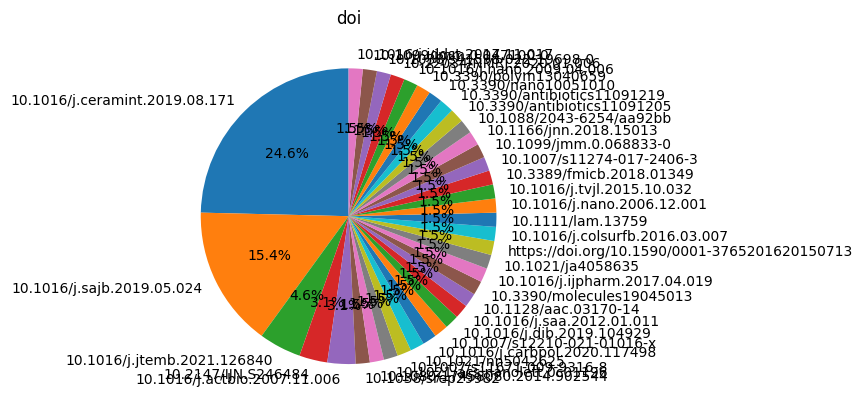

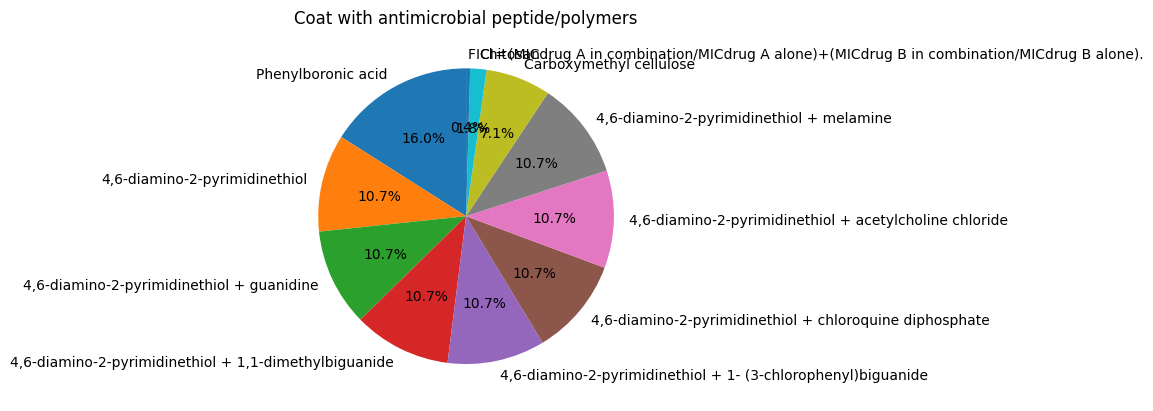

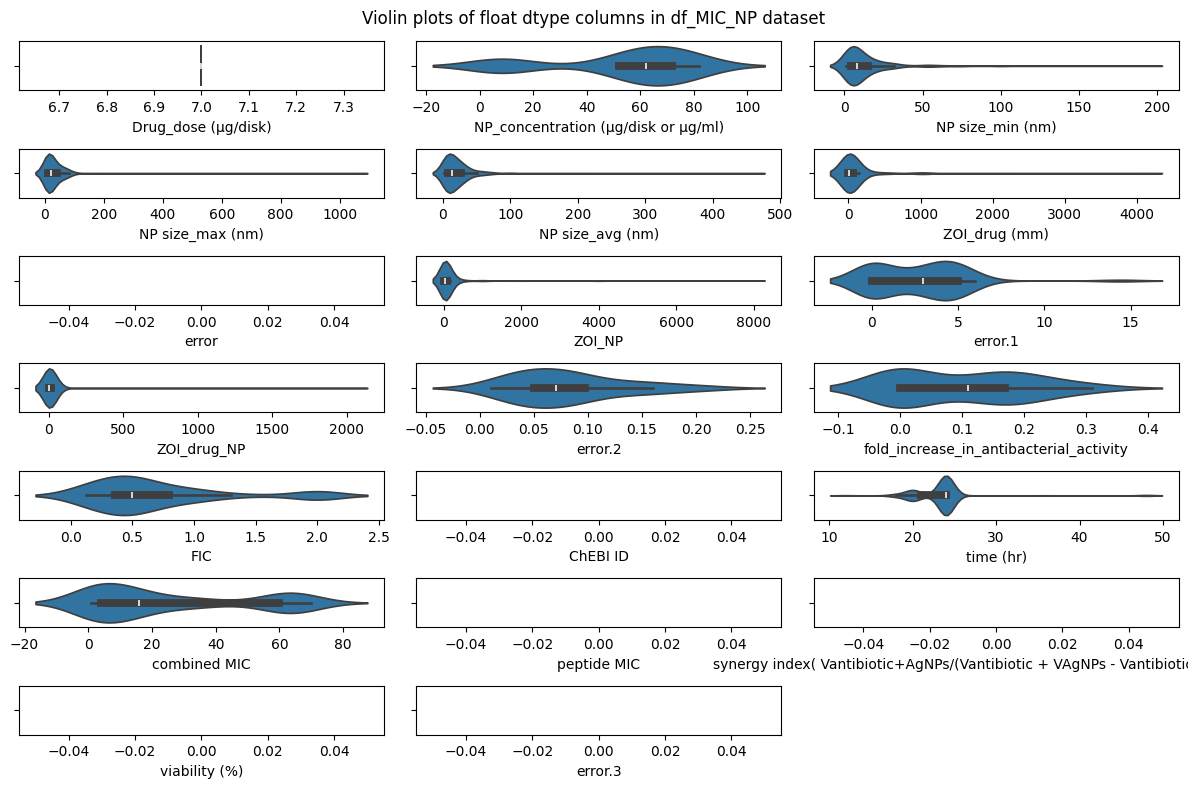

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_MIC_NP is your DataFrame

# Pie plots for object (categorical) columns
for col in df_MC.select_dtypes(include='object').columns:
    plt.figure()
    df_MC[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(col)
    plt.ylabel('')  # Hides the y-label to make it cleaner
    plt.show()

# Violin plots for float columns
float_cols = df_MC.select_dtypes(include='float').columns
num_float_cols = len(float_cols)

# Determine the grid size for subplots
nrows = (num_float_cols // 3) + (1 if num_float_cols % 3 != 0 else 0)
fig, ax = plt.subplots(nrows, 3, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(float_cols):
    sns.violinplot(data=df_MC, x=col, ax=ax[i])
    ax[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

fig.suptitle("Violin plots of float dtype columns in df_MIC_NP dataset")
plt.tight_layout()
plt.show()


In [16]:
df_MC.columns


Index(['NP', 'Bacteria', 'ATCC(species)', 'NP_Synthesis', 'Drug',
       'Drug_dose (μg/disk)', 'NP_concentration (μg/disk or μg/ml)',
       'NP size_min (nm)', 'NP size_max (nm)', 'NP size_avg (nm)', 'shape',
       'method', 'ZOI_drug (mm)', 'error', 'ZOI_NP', 'error.1', 'ZOI_drug_NP',
       'error.2', 'fold_increase_in_antibacterial_activity',
       'Zeta_potential (mV)', 'MDR', 'FIC', 'Effect', 'ChEBI ID', 'reference',
       'doi', 'time (hr)', 'Coat with antimicrobial peptide/polymers',
       'combined MIC', 'peptide MIC',
       'synergy index( Vantibiotic+AgNPs/(Vantibiotic + VAgNPs - Vantibiotic X VAgNPs).)',
       'viability (%)', 'error.3', 'MDR_enc'],
      dtype='object')

In [17]:
''' df_MC.drop(columns=['ATCC(species)', 'Drug_dose (μg/disk)', 'NP_concentration (μg/disk or μg/ml)',
       'error', 'error.1','error.2', 'fold_increase_in_antibacterial_activity',
        'MDR', 'FIC', 'Effect', 'ChEBI ID', 'Coat with antimicrobial peptide/polymers',
       'combined MIC', 'peptide MIC',
       'synergy index( Vantibiotic+AgNPs/(Vantibiotic + VAgNPs - Vantibiotic X VAgNPs).)',
       'viability (%)', 'error.3'], inplace=True) '''

" df_MC.drop(columns=['ATCC(species)', 'Drug_dose (μg/disk)', 'NP_concentration (μg/disk or μg/ml)',\n       'error', 'error.1','error.2', 'fold_increase_in_antibacterial_activity',\n        'MDR', 'FIC', 'Effect', 'ChEBI ID', 'Coat with antimicrobial peptide/polymers',\n       'combined MIC', 'peptide MIC',\n       'synergy index( Vantibiotic+AgNPs/(Vantibiotic + VAgNPs - Vantibiotic X VAgNPs).)',\n       'viability (%)', 'error.3'], inplace=True) "

In [18]:
df_MC.rename(columns={'ZOI_NP': 'MIC_NP (μg/ml)','ZOI_drug (mm)':'MIC_drug (μg/ml)', 'ZOI_drug_NP':'MIC_drug_NP (μg/ml)', 'MDR_enc':'MDR' }, inplace=True)


<ipython-input-18-32adb7dd8ed3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MC.rename(columns={'ZOI_NP': 'MIC_NP (μg/ml)','ZOI_drug (mm)':'MIC_drug (μg/ml)', 'ZOI_drug_NP':'MIC_drug_NP (μg/ml)', 'MDR_enc':'MDR' }, inplace=True)


# spliting into MC_NP, MC_Drug, and MC_Drug_NP datasets

In [19]:
df_MC.columns

Index(['NP', 'Bacteria', 'ATCC(species)', 'NP_Synthesis', 'Drug',
       'Drug_dose (μg/disk)', 'NP_concentration (μg/disk or μg/ml)',
       'NP size_min (nm)', 'NP size_max (nm)', 'NP size_avg (nm)', 'shape',
       'method', 'MIC_drug (μg/ml)', 'error', 'MIC_NP (μg/ml)', 'error.1',
       'MIC_drug_NP (μg/ml)', 'error.2',
       'fold_increase_in_antibacterial_activity', 'Zeta_potential (mV)', 'MDR',
       'FIC', 'Effect', 'ChEBI ID', 'reference', 'doi', 'time (hr)',
       'Coat with antimicrobial peptide/polymers', 'combined MIC',
       'peptide MIC',
       'synergy index( Vantibiotic+AgNPs/(Vantibiotic + VAgNPs - Vantibiotic X VAgNPs).)',
       'viability (%)', 'error.3', 'MDR'],
      dtype='object')

In [22]:
MC_NP_columns = ['NP', 'NP_Synthesis', 'NP size_min (nm)',
       'NP size_max (nm)', 'NP size_avg (nm)', 'shape', 'method', 'Bacteria',
       'MIC_NP (μg/ml)', 'Zeta_potential (mV)', 'reference', 'doi', 'time (hr)', 'MDR']
MC_Drug_columns = ['Bacteria','Drug','reference', 'doi', 'time (hr)', 'MDR', 'MIC_drug (μg/ml)']
MC_Drug_NP_columns = ['NP', 'NP_Synthesis', 'NP size_min (nm)',
       'NP size_max (nm)', 'NP size_avg (nm)', 'shape', 'method', 'Bacteria','Drug',
       'MIC_NP (μg/ml)', 'MIC_drug (μg/ml)', 'MIC_drug_NP (μg/ml)','Zeta_potential (mV)', 'reference', 'doi', 'time (hr)', 'MDR']


MC_NP = df_MC[MC_NP_columns]
MC_Drug = df_MC[MC_Drug_columns]
MC_Drug_NP = df_MC[MC_Drug_NP_columns]


Combining descriptors

In [23]:
drug_descriptors = pd.read_csv('/content/synergy_drug_descriptors_2024_version1.csv')
NP_descriptors = pd.read_csv('/content/synergy_nanoparticle_descriptors.csv')
bacteria_descriptors = pd.read_csv('/content/synergy_bacterial_descriptor.csv')

In [24]:
MC_NP1 = MC_NP.dropna(subset = ['MIC_NP (μg/ml)'])
MC_NP1 = MC_NP1.reset_index(drop='True')
MC_NP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NP                   622 non-null    object 
 1   NP_Synthesis         618 non-null    object 
 2   NP size_min (nm)     610 non-null    float64
 3   NP size_max (nm)     610 non-null    float64
 4   NP size_avg (nm)     610 non-null    float64
 5   shape                557 non-null    object 
 6   method               622 non-null    object 
 7   Bacteria             622 non-null    object 
 8   MIC_NP (μg/ml)       622 non-null    float64
 9   Zeta_potential (mV)  173 non-null    object 
 10  reference            622 non-null    object 
 11  doi                  57 non-null     object 
 12  time (hr)            477 non-null    float64
 13  MDR                  57 non-null     object 
 14  MDR                  622 non-null    int64  
dtypes: float64(5), int64(1), object(9)
memor

In [25]:
NP_descriptors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       33 non-null     int64  
 1   NP                               33 non-null     object 
 2   CID                              33 non-null     int64  
 3   Canonical_smiles                 33 non-null     object 
 4   Valance_electron                 33 non-null     int64  
 5   amw                              33 non-null     float64
 6   lipinskiHBA                      33 non-null     float64
 7   lipinskiHBD                      33 non-null     float64
 8   NumRotatableBonds                33 non-null     float64
 9   NumHBD                           33 non-null     float64
 10  NumHBA                           33 non-null     float64
 11  NumHeavyAtoms                    33 non-null     float64
 12  NumAtoms                

In [26]:
MC_NP2 = pd.merge(MC_NP1, NP_descriptors, on='NP', how='left')
MC_NP2 = pd.merge(MC_NP2, bacteria_descriptors, on='Bacteria', how='left')


In [27]:
MC_NP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NP                               622 non-null    object 
 1   NP_Synthesis                     618 non-null    object 
 2   NP size_min (nm)                 610 non-null    float64
 3   NP size_max (nm)                 610 non-null    float64
 4   NP size_avg (nm)                 610 non-null    float64
 5   shape                            557 non-null    object 
 6   method                           622 non-null    object 
 7   Bacteria                         622 non-null    object 
 8   MIC_NP (μg/ml)                   622 non-null    float64
 9   Zeta_potential (mV)              173 non-null    object 
 10  reference                        622 non-null    object 
 11  doi                              57 non-null     object 
 12  time (hr)             

In [28]:
MC_NP2.to_csv('synergy_MC_NP_data.csv')

In [29]:
MC_Drug1 = MC_Drug.dropna(subset = ['MIC_drug (μg/ml)', 'Drug'])
MC_Drug1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 60 to 3325
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bacteria          799 non-null    object 
 1   Drug              799 non-null    object 
 2   reference         799 non-null    object 
 3   doi               21 non-null     object 
 4   time (hr)         690 non-null    float64
 5   MDR               90 non-null     object 
 6   MDR               799 non-null    int64  
 7   MIC_drug (μg/ml)  799 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 56.2+ KB


In [30]:
MC_Drug2 = pd.merge(MC_Drug1, bacteria_descriptors, on='Bacteria', how='left')
MC_Drug2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bacteria             799 non-null    object 
 1   Drug                 799 non-null    object 
 2   reference            799 non-null    object 
 3   doi                  21 non-null     object 
 4   time (hr)            690 non-null    float64
 5   MDR                  90 non-null     object 
 6   MDR                  799 non-null    int64  
 7   MIC_drug (μg/ml)     799 non-null    float64
 8   Unnamed: 0           794 non-null    float64
 9   IdList               794 non-null    object 
 10  Kingdom              39 non-null     object 
 11  Clade                232 non-null    object 
 12  Phylum               794 non-null    object 
 13  Class                794 non-null    object 
 14  Order                794 non-null    object 
 15  Family               794 non-null    obj

In [31]:
MC_Drug2.columns

Index(['Bacteria', 'Drug', 'reference', 'doi', 'time (hr)', 'MDR', 'MDR',
       'MIC_drug (μg/ml)', 'Unnamed: 0', 'IdList', 'Kingdom', 'Clade',
       'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Superkingdom',
       'Species', 'bac_type', 'gram', 'min_Incub_period, h',
       'avg_Incub_period, h', 'max_Incub_period, h', 'growth_temp, C',
       'biosafety_level', 'isolated_from'],
      dtype='object')

In [32]:
MC_Drug3 = MC_Drug2[['Bacteria', 'Drug', 'reference', 'doi', 'time (hr)', 'MDR', 'MIC_drug (μg/ml)', 'Phylum', 'Class', 'Order', 'Family', 'Genus','bac_type', 'gram', 'min_Incub_period, h', 'avg_Incub_period, h', 'max_Incub_period, h', 'growth_temp, C', 'biosafety_level', 'isolated_from']]


In [33]:
MC_Drug3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bacteria             799 non-null    object 
 1   Drug                 799 non-null    object 
 2   reference            799 non-null    object 
 3   doi                  21 non-null     object 
 4   time (hr)            690 non-null    float64
 5   MDR                  90 non-null     object 
 6   MDR                  799 non-null    int64  
 7   MIC_drug (μg/ml)     799 non-null    float64
 8   Phylum               794 non-null    object 
 9   Class                794 non-null    object 
 10  Order                794 non-null    object 
 11  Family               794 non-null    object 
 12  Genus                794 non-null    object 
 13  bac_type             794 non-null    object 
 14  gram                 794 non-null    object 
 15  min_Incub_period, h  794 non-null    flo

In [34]:
MC_Drug4 = pd.merge(MC_Drug3, drug_descriptors, on='Drug', how='left')
MC_Drug4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Columns: 232 entries, Bacteria to fr_urea
dtypes: float64(217), int64(1), object(14)
memory usage: 1.4+ MB


In [35]:
MC_Drug4.to_csv('synergy_MC_Drug_data.csv')

In [36]:
MC_Drug_NP1 = MC_Drug_NP.dropna(subset = ['MIC_drug_NP (μg/ml)'])
MC_Drug_NP1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 60 to 3325
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NP                   505 non-null    object 
 1   NP_Synthesis         505 non-null    object 
 2   NP size_min (nm)     503 non-null    float64
 3   NP size_max (nm)     503 non-null    float64
 4   NP size_avg (nm)     503 non-null    float64
 5   shape                412 non-null    object 
 6   method               505 non-null    object 
 7   Bacteria             505 non-null    object 
 8   Drug                 499 non-null    object 
 9   MIC_NP (μg/ml)       176 non-null    float64
 10  MIC_drug (μg/ml)     457 non-null    float64
 11  MIC_drug_NP (μg/ml)  505 non-null    float64
 12  Zeta_potential (mV)  115 non-null    object 
 13  reference            505 non-null    object 
 14  doi                  23 non-null     object 
 15  time (hr)            408 non-null    float6

In [37]:
MC_Drug_NP1

NP                                       NP_Synthesis  \
60     Ag  green_synthesis from fungus  Phytophthora infe...   
61     Ag  green_synthesis from fungus  Phytophthora infe...   
62     Ag  green_synthesis from fungus  Phytophthora infe...   
63     Ag  green_synthesis from fungus  Phytophthora infe...   
64     Ag  green_synthesis from fungus  Phytophthora infe...   
...   ...                                                ...   
3321  CuO                  chem_synthesis_from_Cu(NO3)2⋅3H2O   
3322  CuO                  chem_synthesis_from_Cu(NO3)2⋅3H2O   
3323  CuO                  chem_synthesis_from_Cu(NO3)2⋅3H2O   
3324  CuO                  chem_synthesis_from_Cu(NO3)2⋅3H2O   
3325  CuO                  chem_synthesis_from_Cu(NO3)2⋅3H2O   

      NP size_min (nm)  NP size_max (nm)  NP size_avg (nm)      shape method  \
60                 5.0              80.0              60.0  spherical    MIC   
61                 5.0              80.0              60.0  spherical    MIC   
62                 5.0              80.0              60.0  spherical    MIC   
63                 5.0              80.0              60.0  spherical    MIC   
64                 5.0              80.0              60.0  spherical    MIC   
...                ...               ...               ...        ...    ...   
3321               4.0              12.0               8.0  spherical    MIC   
3322               4.0              12.0               8.0  spherical    MIC   
3323               4.0              12.0               8.0  spherical    MIC   
3324               4.0              12.0               8.0  spherical    MIC   
3325               4.0              12.0               8.0  spherical    MIC   

                    Bacteria          Drug  MIC_NP (μg/ml)  MIC_drug (μg/ml)  \
60     Staphylococcus aureus     Cefazolin             5.0            0.6250   
61    Pseudomonas aeruginosa     Cefazolin             2.5            0.6250   
62          Escherichia coli     Cefazolin             2.5            0.3125   
63     Staphylococcus aureus     Mupirocin             5.0            0.6250   
64    Pseudomonas aeruginosa     Mupirocin             2.5            0.3125   
...                      ...           ...             ...               ...   
3321   Staphylococcus aureus  Tetracycline            30.0            0.0500   
3322   Staphylococcus aureus  Tetracycline           700.0           12.0000   
3323  Pseudomonas aeruginosa  Tetracycline          1600.0           12.0000   
3324  Pseudomonas aeruginosa  Tetracycline          1000.0            6.2000   
3325  Pseudomonas aeruginosa  Tetracycline          1500.0           12.0000   

      MIC_drug_NP (μg/ml) Zeta_potential (mV)  \
60                    0.6               -13.7   
61                    0.3               -13.7   
62                    0.5               -13.7   
63                    0.3               -13.7   
64                    0.1               -13.7   
...                   ...                 ...   
3321                 17.5                 NaN   
3322                475.0                 NaN   
3323               1175.0                 NaN   
3324                605.0                 NaN   
3325                285.0                 NaN   

                                              reference  \
60            https://www.nature.com/articles/srep29982   
61            https://www.nature.com/articles/srep29982   
62            https://www.nature.com/articles/srep29982   
63            https://www.nature.com/articles/srep29982   
64            https://www.nature.com/articles/srep29982   
...                                                 ...   
3321  https://www.sciencedirect.com/science/article/...   
3322  https://www.sciencedirect.com/science/article/...   
3323  https://www.sciencedirect.com/science/article/...   
3324  https://www.sciencedirect.com/science/article/...   
3325  https://www.sciencedirect.com/science/article/...   

                  

In [38]:
MC_Drug_NP2 = pd.merge(MC_Drug_NP1, NP_descriptors, on='NP', how='left')

In [39]:
MC_Drug_NP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NP                               505 non-null    object 
 1   NP_Synthesis                     505 non-null    object 
 2   NP size_min (nm)                 503 non-null    float64
 3   NP size_max (nm)                 503 non-null    float64
 4   NP size_avg (nm)                 503 non-null    float64
 5   shape                            412 non-null    object 
 6   method                           505 non-null    object 
 7   Bacteria                         505 non-null    object 
 8   Drug                             499 non-null    object 
 9   MIC_NP (μg/ml)                   176 non-null    float64
 10  MIC_drug (μg/ml)                 457 non-null    float64
 11  MIC_drug_NP (μg/ml)              505 non-null    float64
 12  Zeta_potential (mV)   

In [40]:
MC_Drug_NP3 = pd.merge(MC_Drug_NP2, bacteria_descriptors, on='Bacteria', how='left')
MC_Drug_NP3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NP                               505 non-null    object 
 1   NP_Synthesis                     505 non-null    object 
 2   NP size_min (nm)                 503 non-null    float64
 3   NP size_max (nm)                 503 non-null    float64
 4   NP size_avg (nm)                 503 non-null    float64
 5   shape                            412 non-null    object 
 6   method                           505 non-null    object 
 7   Bacteria                         505 non-null    object 
 8   Drug                             499 non-null    object 
 9   MIC_NP (μg/ml)                   176 non-null    float64
 10  MIC_drug (μg/ml)                 457 non-null    float64
 11  MIC_drug_NP (μg/ml)              505 non-null    float64
 12  Zeta_potential (mV)   

In [41]:
MC_Drug_NP4 = pd.merge(MC_Drug_NP3, drug_descriptors, on='Drug', how='left')
MC_Drug_NP4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Columns: 294 entries, NP to fr_urea
dtypes: float64(264), int64(5), object(25)
memory usage: 1.1+ MB


In [42]:
MC_Drug_NP4.to_csv('synergy_MC_Drug_NP_data.csv')

# spliting into ZOI_NP, ZOI_Drug, and ZOI_Drug_NP datasets

In [43]:
df_ZOI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1884 entries, 0 to 3312
Data columns (total 34 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   NP                                                                                1884 non-null   object 
 1   Bacteria                                                                          1884 non-null   object 
 2   ATCC(species)                                                                     422 non-null    object 
 3   NP_Synthesis                                                                      1870 non-null   object 
 4   Drug                                                                              1254 non-null   object 
 5   Drug_dose (μg/disk)                                                               1185 non-null   float64
 6   NP_co

In [44]:
df_ZOI = df_ZOI.drop(['MDR'], axis=1)

In [45]:
df_ZOI.rename(columns={'NP_concentration (μg/disk or μg/ml)': 'NP_concentration (μg/ml)','ZOI_NP':'ZOI_NP (mm)', 'ZOI_drug_NP':'ZOI_Drug_NP (mm)', 'MDR_enc':'MDR' }, inplace=True)


In [46]:
df_ZOI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1884 entries, 0 to 3312
Data columns (total 33 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   NP                                                                                1884 non-null   object 
 1   Bacteria                                                                          1884 non-null   object 
 2   ATCC(species)                                                                     422 non-null    object 
 3   NP_Synthesis                                                                      1870 non-null   object 
 4   Drug                                                                              1254 non-null   object 
 5   Drug_dose (μg/disk)                                                               1185 non-null   float64
 6   NP_co

In [47]:
df_ZOI.columns

Index(['NP', 'Bacteria', 'ATCC(species)', 'NP_Synthesis', 'Drug',
       'Drug_dose (μg/disk)', 'NP_concentration (μg/ml)', 'NP size_min (nm)',
       'NP size_max (nm)', 'NP size_avg (nm)', 'shape', 'method',
       'ZOI_drug (mm)', 'error', 'ZOI_NP (mm)', 'error.1', 'ZOI_Drug_NP (mm)',
       'error.2', 'fold_increase_in_antibacterial_activity',
       'Zeta_potential (mV)', 'FIC', 'Effect', 'ChEBI ID', 'reference', 'doi',
       'time (hr)', 'Coat with antimicrobial peptide/polymers', 'combined MIC',
       'peptide MIC',
       'synergy index( Vantibiotic+AgNPs/(Vantibiotic + VAgNPs - Vantibiotic X VAgNPs).)',
       'viability (%)', 'error.3', 'MDR'],
      dtype='object')

In [48]:
ZOI_NP_columns = ['NP', 'NP_Synthesis', 'NP_concentration (μg/ml)',
       'NP size_min (nm)', 'NP size_max (nm)', 'NP size_avg (nm)', 'shape',
       'method', 'Bacteria', 'ZOI_NP (mm)',
       'Zeta_potential (mV)',  'reference',
       'doi', 'time (hr)', 'MDR']
ZOI_Drug_columns = ['Bacteria','Drug', 'Drug_dose (μg/disk)', 'reference',
       'doi', 'time (hr)', 'MDR', 'ZOI_drug (mm)']
ZOI_Drug_NP_columns = ['NP', 'NP_Synthesis', 'Drug_dose (μg/disk)', 'NP_concentration (μg/ml)', 'NP size_min (nm)',
       'NP size_max (nm)', 'NP size_avg (nm)', 'shape', 'method','Bacteria', 'Drug',
       'ZOI_drug (mm)','ZOI_NP (mm)', 'ZOI_Drug_NP (mm)', 'reference', 'doi',
       'time (hr)', 'MDR']

In [49]:
ZOI_NP = df_ZOI[ZOI_NP_columns]
ZOI_Drug = df_ZOI[ZOI_Drug_columns]
ZOI_Drug_NP = df_ZOI[ZOI_Drug_NP_columns]

In [50]:
ZOI_NP1 = ZOI_NP.dropna(subset = ['ZOI_NP (mm)','NP_concentration (μg/ml)'])
ZOI_NP1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 20 to 3312
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NP                        871 non-null    object 
 1   NP_Synthesis              871 non-null    object 
 2   NP_concentration (μg/ml)  871 non-null    float64
 3   NP size_min (nm)          867 non-null    float64
 4   NP size_max (nm)          869 non-null    float64
 5   NP size_avg (nm)          871 non-null    float64
 6   shape                     850 non-null    object 
 7   method                    871 non-null    object 
 8   Bacteria                  871 non-null    object 
 9   ZOI_NP (mm)               871 non-null    float64
 10  Zeta_potential (mV)       143 non-null    object 
 11  reference                 871 non-null    object 
 12  doi                       70 non-null     object 
 13  time (hr)                 731 non-null    float64
 14  MDR          

In [51]:
ZOI_NP2 = pd.merge(ZOI_NP1, NP_descriptors, on='NP', how='left')
ZOI_NP2 = pd.merge(ZOI_NP2, bacteria_descriptors, on='Bacteria', how='left')

In [52]:
ZOI_NP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NP                               871 non-null    object 
 1   NP_Synthesis                     871 non-null    object 
 2   NP_concentration (μg/ml)         871 non-null    float64
 3   NP size_min (nm)                 867 non-null    float64
 4   NP size_max (nm)                 869 non-null    float64
 5   NP size_avg (nm)                 871 non-null    float64
 6   shape                            850 non-null    object 
 7   method                           871 non-null    object 
 8   Bacteria                         871 non-null    object 
 9   ZOI_NP (mm)                      871 non-null    float64
 10  Zeta_potential (mV)              143 non-null    object 
 11  reference                        871 non-null    object 
 12  doi                   

In [53]:
ZOI_NP2.to_csv('synergy_ZOI_NP_data.csv')

In [54]:
ZOI_Drug.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1884 entries, 0 to 3312
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bacteria             1884 non-null   object 
 1   Drug                 1254 non-null   object 
 2   Drug_dose (μg/disk)  1185 non-null   float64
 3   reference            1884 non-null   object 
 4   doi                  85 non-null     object 
 5   time (hr)            1640 non-null   float64
 6   MDR                  1884 non-null   int64  
 7   ZOI_drug (mm)        1142 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 132.5+ KB


In [55]:
ZOI_Drug1 = ZOI_Drug.dropna(subset = ['ZOI_drug (mm)', 'Drug'])
ZOI_Drug1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117 entries, 0 to 3300
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bacteria             1117 non-null   object 
 1   Drug                 1117 non-null   object 
 2   Drug_dose (μg/disk)  1076 non-null   float64
 3   reference            1117 non-null   object 
 4   doi                  33 non-null     object 
 5   time (hr)            951 non-null    float64
 6   MDR                  1117 non-null   int64  
 7   ZOI_drug (mm)        1117 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 78.5+ KB


In [56]:
ZOI_Drug2 = pd.merge(ZOI_Drug1, bacteria_descriptors, on='Bacteria', how='left')
ZOI_Drug2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bacteria             1117 non-null   object 
 1   Drug                 1117 non-null   object 
 2   Drug_dose (μg/disk)  1076 non-null   float64
 3   reference            1117 non-null   object 
 4   doi                  33 non-null     object 
 5   time (hr)            951 non-null    float64
 6   MDR                  1117 non-null   int64  
 7   ZOI_drug (mm)        1117 non-null   float64
 8   Unnamed: 0           1105 non-null   float64
 9   IdList               1105 non-null   object 
 10  Kingdom              65 non-null     object 
 11  Clade                401 non-null    object 
 12  Phylum               1105 non-null   object 
 13  Class                1105 non-null   object 
 14  Order                1105 non-null   object 
 15  Family               1104 non-null   o

In [57]:
ZOI_Drug3 = pd.merge(ZOI_Drug2, drug_descriptors, on='Drug', how='left')
ZOI_Drug3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Columns: 238 entries, Bacteria to fr_urea
dtypes: float64(219), int64(1), object(18)
memory usage: 2.0+ MB


In [58]:
ZOI_Drug3.to_csv('synergy_ZOI_Drug_data.csv')

In [59]:
ZOI_Drug_NP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1884 entries, 0 to 3312
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NP                        1884 non-null   object 
 1   NP_Synthesis              1870 non-null   object 
 2   Drug_dose (μg/disk)       1185 non-null   float64
 3   NP_concentration (μg/ml)  1805 non-null   float64
 4   NP size_min (nm)          1833 non-null   float64
 5   NP size_max (nm)          1835 non-null   float64
 6   NP size_avg (nm)          1837 non-null   float64
 7   shape                     1794 non-null   object 
 8   method                    1884 non-null   object 
 9   Bacteria                  1884 non-null   object 
 10  Drug                      1254 non-null   object 
 11  ZOI_drug (mm)             1142 non-null   float64
 12  ZOI_NP (mm)               894 non-null    float64
 13  ZOI_Drug_NP (mm)          1079 non-null   float64
 14  reference    

In [60]:
ZOI_Drug_NP1 = ZOI_Drug_NP.dropna(subset = ['ZOI_Drug_NP (mm)','Drug'])
ZOI_Drug_NP1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 0 to 3253
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NP                        1069 non-null   object 
 1   NP_Synthesis              1069 non-null   object 
 2   Drug_dose (μg/disk)       1012 non-null   float64
 3   NP_concentration (μg/ml)  1060 non-null   float64
 4   NP size_min (nm)          1067 non-null   float64
 5   NP size_max (nm)          1067 non-null   float64
 6   NP size_avg (nm)          1069 non-null   float64
 7   shape                     1047 non-null   object 
 8   method                    1069 non-null   object 
 9   Bacteria                  1069 non-null   object 
 10  Drug                      1069 non-null   object 
 11  ZOI_drug (mm)             966 non-null    float64
 12  ZOI_NP (mm)               157 non-null    float64
 13  ZOI_Drug_NP (mm)          1069 non-null   float64
 14  reference    

In [61]:
ZOI_Drug_NP2 = pd.merge(ZOI_Drug_NP1, NP_descriptors, on='NP', how='left')

In [62]:
ZOI_Drug_NP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NP                               1069 non-null   object 
 1   NP_Synthesis                     1069 non-null   object 
 2   Drug_dose (μg/disk)              1012 non-null   float64
 3   NP_concentration (μg/ml)         1060 non-null   float64
 4   NP size_min (nm)                 1067 non-null   float64
 5   NP size_max (nm)                 1067 non-null   float64
 6   NP size_avg (nm)                 1069 non-null   float64
 7   shape                            1047 non-null   object 
 8   method                           1069 non-null   object 
 9   Bacteria                         1069 non-null   object 
 10  Drug                             1069 non-null   object 
 11  ZOI_drug (mm)                    966 non-null    float64
 12  ZOI_NP (mm)         

In [63]:
ZOI_Drug_NP3 = pd.merge(ZOI_Drug_NP2, bacteria_descriptors, on='Bacteria', how='left')
ZOI_Drug_NP3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 83 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NP                               1069 non-null   object 
 1   NP_Synthesis                     1069 non-null   object 
 2   Drug_dose (μg/disk)              1012 non-null   float64
 3   NP_concentration (μg/ml)         1060 non-null   float64
 4   NP size_min (nm)                 1067 non-null   float64
 5   NP size_max (nm)                 1067 non-null   float64
 6   NP size_avg (nm)                 1069 non-null   float64
 7   shape                            1047 non-null   object 
 8   method                           1069 non-null   object 
 9   Bacteria                         1069 non-null   object 
 10  Drug                             1069 non-null   object 
 11  ZOI_drug (mm)                    966 non-null    float64
 12  ZOI_NP (mm)         

In [64]:
ZOI_Drug_NP4 = pd.merge(ZOI_Drug_NP3, drug_descriptors, on='Drug', how='left')
ZOI_Drug_NP4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Columns: 294 entries, NP to fr_urea
dtypes: float64(267), int64(4), object(23)
memory usage: 2.4+ MB


In [65]:
ZOI_Drug_NP4.to_csv('synergy_ZOI_Drug_NP_data.csv')